In [3]:
import transportation_tutorials as tt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Histograms and Frequency Plots

In this section, we will review the creation of histograms and 
frequency plots for data.  These two kinds of plots are very
similar: histograms plot the distribution of continuous data
by grouping similar values together in (typically homogeneously 
sized) bins, while frequency plots are a similar visualization
for discrete (categorical) data that is by its nature already
"binned".  

## Computing Frequency Data

We'll create some frequency plots of trip mode using data from the 
example `trips` data.

In [4]:
trips = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))

In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123874 entries, 0 to 123873
Data columns (total 20 columns):
hh_id              123874 non-null int64
person_id          123874 non-null int64
person_num         123874 non-null int64
tour_id            123874 non-null int64
stop_id            123874 non-null int64
inbound            123874 non-null int64
tour_purpose       123874 non-null object
orig_purpose       123874 non-null object
dest_purpose       123874 non-null object
orig_mgra          123874 non-null int64
dest_mgra          123874 non-null int64
parking_mgra       123874 non-null int64
stop_period        123874 non-null int64
trip_mode          123874 non-null int64
trip_board_tap     123874 non-null int64
trip_alight_tap    123874 non-null int64
tour_mode          123874 non-null int64
smplRate_geo       123874 non-null float64
autotech           123874 non-null int64
tncmemb            123874 non-null int64
dtypes: float64(1), int64(16), object(3)
memory usage: 18.9+ MB


The pandas.Series object has a `value_counts` method that
counts the number of each of unique values in the series.
It returns a new Series, with the original values as the
index. By default the result is sorted in decreasing order 
of frequency, but by setting `sort` to False we can get 
the results in order by the original values, which in this
case will make a more readable figure (as similar modes have
adjacent code numbers).

In [6]:
trip_mode_counts = trips.trip_mode.value_counts(sort=False)
trip_mode_counts

1     77187
2      6659
3     19264
4      1348
5     10355
6       872
9      3290
10     1563
11      330
14        6
15       16
16        5
17        9
18        5
19       18
20     2947
Name: trip_mode, dtype: int64

There are 20 distinct trip modes recognized in the SERPM 
trip file. They are identified by code numbers, but we
can create a python dictionary that maps the code numbers
to slightly more human-friendly names that will be used in our
figures.

In [7]:
trip_mode_dictionary = {
    1: "DRIVEALONEFREE",
    2: "DRIVEALONEPAY",
    3: "SHARED2GP",
    4: "SHARED2PAY",
    5: "SHARED3GP",
    6: "SHARED3PAY",
    7: "TNCALONE",
    8: "TNCSHARED",
    9: "WALK",
    10: "BIKE",
    11: "WALK_MIX",
    12: "WALK_PRMW",
    13: "WALK_PRMD",
    14: "PNR_MIX",
    15: "PNR_PRMW",
    16: "PNR_PRMD",
    17: "KNR_MIX",
    18: "KNR_PRMW",
    19: "KNR_PRMD",
    20: "SCHBUS",
}

We can apply this dictionary to the `trip_mode_counts` index using the 
`map` method.

In [8]:
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

DRIVEALONEFREE    77187
DRIVEALONEPAY      6659
SHARED2GP         19264
SHARED2PAY         1348
SHARED3GP         10355
SHARED3PAY          872
WALK               3290
BIKE               1563
WALK_MIX            330
PNR_MIX               6
PNR_PRMW             16
PNR_PRMD              5
KNR_MIX               9
KNR_PRMW              5
KNR_PRMD             18
SCHBUS             2947
Name: trip_mode, dtype: int64

## Plotting Frequency Data

Now we have a Series that contains the data we want to use.
We can plot this data using the `plot` method. This convenient
method makes it easy to generate a quick visualization of the
data.

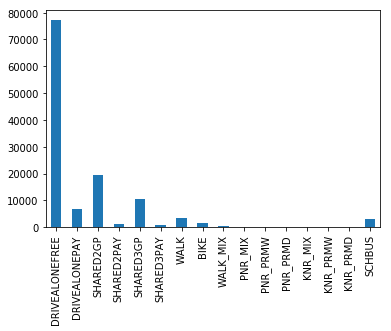

In [9]:
trip_mode_counts.plot(kind='bar');

The `plot` method takes a `kind` argument to define
the kind of plot to generate -- a variety of kinds
are available, including the 'bar' chart we see above,
or a horizontally oriented version in a 'barh' chart:

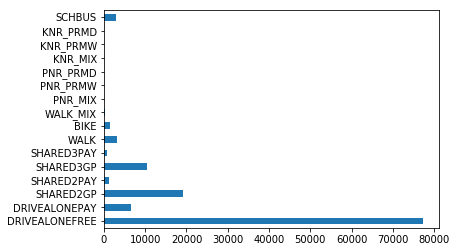

In [14]:
trip_mode_counts.plot(kind='barh');

or a 'pie' chart:

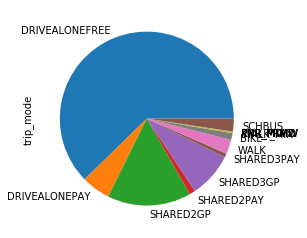

In [15]:
trip_mode_counts.plot(kind='pie');

You might notice the plotting function isn't necessarily 
smart about things like overlapping labels. For a quick
visualization created to help you understand your own data,
this might not be a big deal, but for generating figures
that will be inserted into reports or shared with others,
you'll want to manage these kinds of problems by manipulating
the visualization data before plotting it.

### Customizing Plots

If the default output isn't exactly what you want, it
is possible to customize the output, both by giving additional
arguments to the `plot` method, and by manipulating the
resulting chart (actually a `Axes` object) before 
rendering the results.

The arguments that the `plot` method will accept vary
depending on the plot kind, to customize
the appearance of the result. For example, the `barh` 
plot can accept arguments for `color` and `figsize` to
make a tall figure with red bars:

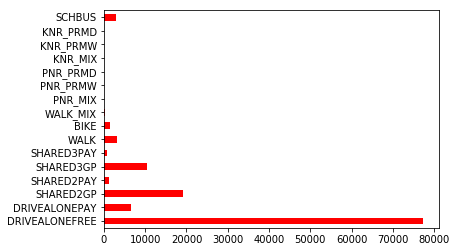

In [32]:
trip_mode_counts.plot(kind='barh', color='red');

But using the `color` argument on a pie chart doens't make
sense and results in an error:

pie() got an unexpected keyword argument 'color'


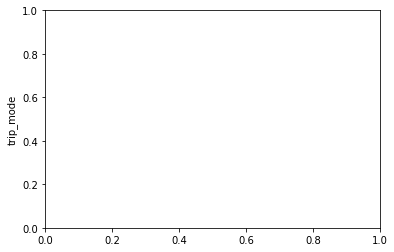

In [33]:
try:
    trip_mode_counts.plot(kind='pie', color='red')
except TypeError as err:
    print(err)

A more powerful set of figure customization tools is 
available by manipulating the return value of the `plot`
method, which is a matplotlib `Axes` object. 
This object is can be further modified or customized to create a well
crafted output figure.  For example, we can change the
colors, add some axis labels, and format the tick marks like this:

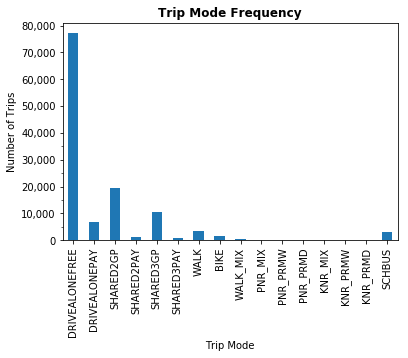

In [54]:
ax = trip_mode_counts.plot(kind='bar')
ax.set_title("Trip Mode Frequency", fontweight='bold')
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");
ax.set_yticklabels([f"{i:,.0f}" for i in ax.get_yticks()])
ax.set_yticks([5000,15000,25000,35000], minor=True);

This figure has a lot of detail that is probably unnecessary
for our presentation. In particular, there are a lot of different
variations of transit modes, but most have a trivial share of
trips (at least within the Jupiter study area).  It might be better
to aggregate all the transit trips into a single bucket for this 
figure.  We could do so in a variety of ways -- we could manipulate
the final counts to sum up all the transit parts, or we could manipulate
the original source data before we tally the numbers.  Let's do the 
latter: we'll add a new code (21) to the dictionary for general transit, 
map all the transit modes to it, and recompute the tally.

In [10]:
tm = {11,12,13,14,15,16,17,18,19}
trip_mode_dictionary[21] = 'TRANSIT'
trip_mode_counts = trips.trip_mode.map(lambda x: 21 if x in tm else x).value_counts(sort=False)
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

DRIVEALONEFREE    77187
DRIVEALONEPAY      6659
SHARED2GP         19264
SHARED2PAY         1348
SHARED3GP         10355
SHARED3PAY          872
WALK               3290
BIKE               1563
SCHBUS             2947
TRANSIT             389
Name: trip_mode, dtype: int64

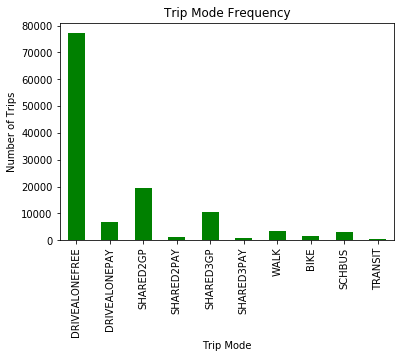

In [11]:
ax = trip_mode_counts.plot(kind='bar', color='green')
ax.set_title("Trip Mode Frequency")
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");

## Plotting Histogram Data

We'll create some histograms of household income using data from the 
example `households` data.

In [55]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'), index_col=0)
hh.set_index('hh_id', inplace=True)

In [56]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18178 entries, 1690841 to 1726370
Data columns (total 8 columns):
home_mgra       18178 non-null int64
income          18178 non-null int64
autos           18178 non-null int64
transponder     18178 non-null int64
cdap_pattern    18178 non-null object
jtf_choice      18178 non-null int64
autotech        18178 non-null int64
tncmemb         18178 non-null int64
dtypes: int64(7), object(1)
memory usage: 1.2+ MB


As with plotting general figures, pandas includes a pre-made method for
making simple histograms, using the `hist` method on a pandas.Series.

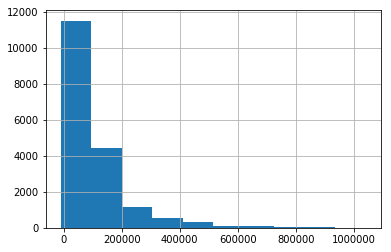

In [58]:
hh.income.hist();

Also like the `plot` method, the `hist` method includes
a limited ability to customize the output by passing 
certain arguments.  For example, we can increase the
number of bins from the default 10 to a more interesting
50, get rid of the grid lines, and change the color to
red:

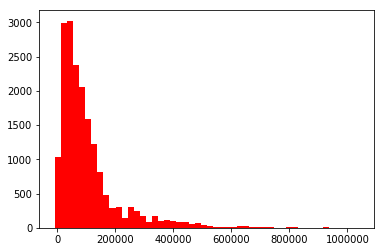

In [65]:
hh.income.hist(bins=50, grid=False, color='red');

It's also possible to give explicit boundaries to the bins
argument of `hist` by using a list or array, but this is
not generally useful as this function doesn't properly
normalize the result, giving a histogram that is at best
misleading:

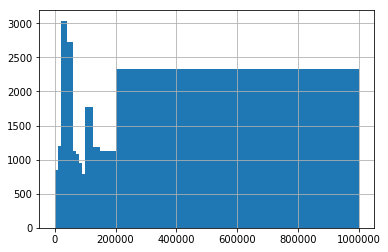

In [85]:
bins = np.array([0,10,20,40,60,70,80,90,100,125,150,200,1000]) * 1000
hh.income.hist(bins=bins);

Instead, if non-uniform bin sizes are desired, it's better
to use the `hist` function from a matplotlib `Axes`, which allows for
correct normalization for density:

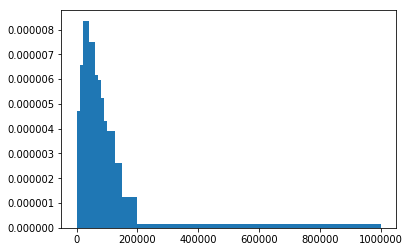

In [90]:
fig, ax = plt.subplots()
ax.hist(hh.income, bins=bins, density=True);

You'll note that the y-axis on this figure has changed scale, as
instead of giving the count of observations in each bin it now 
gives the density (i.e., expected number of households within each 
one-dollar-width interval, averaged across all such intervals in each bin).
The resulting figure looks much more similar to the red histogram
shown above.

Also like `plot`, the return value of the `hist`
method is a matplotlib `Axes` object, 
that can be further modified or customized to create a well
crafted output figure.  For example, we can change the
plot limits on the x axis so we don't give so much area
to plot a long tail, add some axis labels, and format the 
tick marks like this:

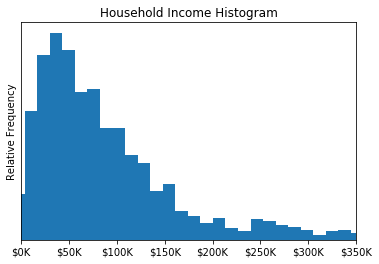

In [101]:
ax = hh.income.hist(grid=False, bins=80)
ax.set_xlim(0,350_000)
ax.set_title("Household Income Histogram");
ax.set_xticklabels([f"${i/1000:.0f}K" for i in ax.get_xticks()]);
ax.set_ylabel("Relative Frequency");
ax.set_yticks([]);